<a href="https://colab.research.google.com/github/JSR-Mario/genomicaComputacional/blob/main/Tarea0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autómata Celular Elemental

Un autómata celular elemental (CA) es un modelo de cómputo basado en el cómputo de los valores en una malla basándonos en una función de los valores de lo vecinos
$$
x_{i} = f(x_{i-r}, \ldots, x_{i}, \ldots, x_{i+r})
$$

En el caso de los autómatas celulares elementales los posibles valores de salida son $\{ 0,1 \}$ y $r=1$ es decir, el valor de la posición $i$ está determinada por sus primeros vecinos que sólo pueden valer $0$ o $1$.

Haciendo un poco de cuentas elementales pueden ver que hay 256 diferentes reglas de autómatas celulares elementales.

La página de Wikipedia es [ésta](https://en.wikipedia.org/wiki/Elementary_cellular_automaton)


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import array
from numpy.random import choice

In [2]:
def regla(numero):
  """Toma un numero en decimal lo convierte a binario y regresa su
  versión de 8 bits.

  Usa un padding de 0's a la izquierda
  """
  binario = bin(numero)
  rtxt = '0'*7 + binario[2:]
  return rtxt[-8:]

regla(58)

'00111010'

In [4]:
def creamatriz( L, N ):
  """Crea una lista de listas de ceros que representa una matriz
  de L filas y N columnas
  """
  # M = [[0]*N] *L
  # return array(M)
  return np.zeros((L, N))

def regla_idx(r, i):
  """Toma 2 strings y regresa el bit de salida de la regla basada en los vecinos.

  Parameters
  ----------
  r: string de 8 bits
  i: string de 3 bits

  Returns
  -------
  string de 1 bit
  """
  rr = ''.join(list(reversed(list(r))))
  n = int(i,2)
  return rr[n]

regla_idx(regla(58), '001')

'1'

In [43]:
def itera_regla(r, v):
  """
  Iteramos la regla en el parámetro
  sobre el vector pasado como parámetro

  Toma un contexto de 3 vecinos en la posición i-ésima
  y computa el valor asociado por la regla

  ejemplo
  si el vector v es
  [0 1 0 0 0 1 0 0 0 1 1 1 0 ]

  entonces la aplicacion de la regla r en v lo que hace es

  0 1 0 ---> regla_idx(r_jk, 010) ---> 0


  Regresa:
  Un vector con los nuevos valores
  """

  R = v.copy()
  n = len(v)

  # La idea es aplicar la regla a cada 3 bits, para los bordes usamos modulo para
  # ver el bit del otro lado
  for i in range(len(v)):
    R[i] = regla_idx(r, f"{int(v[(i-1)%n])}{int(v[(i)])}{int(v[(i+1)%n])}")

  return R

In [40]:
# creamos una matriz de puros 0s en la que
# prendemos el bit 101
M = creamatriz(1000,2001)
M[0,1001] = 1

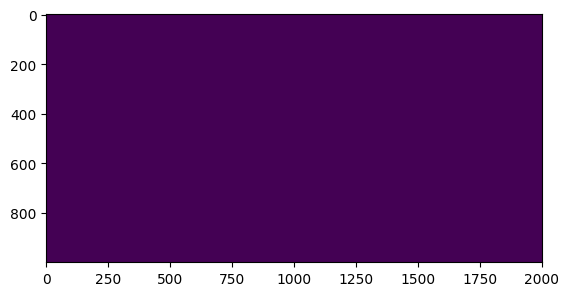

In [41]:
plt.imshow(M)

Vamos a iterar la regla 90 sobre un solo bit prendido

In [44]:
# generamos la regla 90
r90 = regla(90)
print(r90)
# aplicamos la regla 90 en la matriz recién generada
for idx in range(1,len(M)):
    v = M[idx-1]
    vn = array( itera_regla( r90, v ) )
    M[idx] =vn
M

01011010


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.]])

Vamos a graficarlo

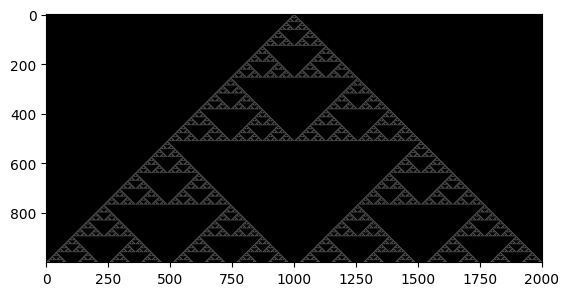

In [45]:
plt.imshow(M, cmap='gray')